## task4_3(Consider all possible features and reduce the dim by PCA)

### 预处理

In [1]:
import pandas as pd
import numpy as np
all_data=pd.read_csv('PRSA_data.csv')
all_data=all_data.drop('No',axis=1)

In [2]:
#night morning afternoon evening
all_data['nightornot']=all_data['hour']<6 #treat 0 1 2 3 4 5 as night
for i in range(len(all_data)):
    if all_data['nightornot'][i]==True:
        all_data['nightornot'][i]=1
    else:
        all_data['nightornot'][i]=0

all_data['morningornot']=(all_data['hour']>5)&(all_data['hour']<12)  #treat 6 7 8 9 10 11 as morning
for i in range(len(all_data)):
    if all_data['morningornot'][i]==True:
        all_data['morningornot'][i]=1
    else:
        all_data['morningornot'][i]=0

all_data['afternoonornot']=(all_data['hour']>11)&(all_data['hour']<18)  #treat 12 13 14 15 16 17 as afternoon 
for i in range(len(all_data)):
    if all_data['afternoonornot'][i]==True:
        all_data['afternoonornot'][i]=1
    else:
        all_data['afternoonornot'][i]=0

all_data['eveningornot']=(all_data['hour']>17)  #treat 18 19 20 21 22 23 24 as evening
for i in range(len(all_data)):
    if all_data['eveningornot'][i]==True:
        all_data['eveningornot'][i]=1
    else:
        all_data['eveningornot'][i]=0

C:\Users\lzh\AppData\Local\Temp/ipykernel_27384/1125572838.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['nightornot'][i]=1
d:\Program Files\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\lzh\AppData\Local\Temp/ipykernel_27384/1125572838.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['morningo

In [3]:
#节假日
from datetime import date
all_data['weekdaysornot']=all_data['hour']<6
for i in range(len(all_data)):
    a=all_data['year'][i]
    b=all_data['month'][i]
    c=all_data['day'][i]
    if (date(a,b,c).weekday()==0) or (date(a,b,c).weekday()==1) or (date(a,b,c).weekday()==2) or (date(a,b,c).weekday()==3) or (date(a,b,c).weekday()==4):
        all_data['weekdaysornot'][i]=1
    else:
        all_data['weekdaysornot'][i]=0
#节假日也归为weekends
for i in range(len(all_data)):
    if (all_data['month'][i]==5)and(all_data['day'][i]==1 or all_data['day'][i]==2 or all_data['day'][i]==3):
        all_data['weekdaysornot'][i]=0
    if (all_data['month'][i]==10)and(all_data['day'][i]==1 or all_data['day'][i]==2 or all_data['day'][i]==3 or all_data['day'][i]==4 or all_data['day'][i]==5 or all_data['day'][i]==6 or all_data['day'][i]==7):
        all_data['weekdaysornot'][i]=0
    if (all_data['year'][i]==2010)and(all_data['month'][i]==1)and(all_data['day'][i]>7)and(all_data['day'][i]<20):
        all_data['weekdaysornot'][i]=0
    if (all_data['year'][i]==2011)and(all_data['month'][i]==1)and(all_data['day'][i]>28)and(all_data['day'][i]<31):
        all_data['weekdaysornot'][i]=0
    if (all_data['year'][i]==2011)and(all_data['month'][i]==2)and(all_data['day'][i]>0)and(all_data['day'][i]<9):
        all_data['weekdaysornot'][i]=0
    if (all_data['year'][i]==2012)and(all_data['month'][i]==1)and(all_data['day'][i]>18)and(all_data['day'][i]<29):
        all_data['weekdaysornot'][i]=0
    if (all_data['year'][i]==2013)and(all_data['month'][i]==2)and(all_data['day'][i]>5)and(all_data['day'][i]<16):
        all_data['weekdaysornot'][i]=0
    if (all_data['year'][i]==2014)and(all_data['month'][i]==1)and(all_data['day'][i]>25)and(all_data['day'][i]<31):
        all_data['weekdaysornot'][i]=0
    if (all_data['year'][i]==2014)and(all_data['month'][i]==2)and(all_data['day'][i]>0)and(all_data['day'][i]<6):
        all_data['weekdaysornot'][i]=0

C:\Users\lzh\AppData\Local\Temp/ipykernel_27384/410020112.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['weekdaysornot'][i]=1


In [4]:
#考虑政策影响
all_data['before_police_or_not']=all_data['year']<2014  
for i in range(len(all_data)):
    if all_data['before_police_or_not'][i]==True:
        all_data['before_police_or_not'][i]=1
    else:
        all_data['before_police_or_not'][i]=0

C:\Users\lzh\AppData\Local\Temp/ipykernel_27384/3335211253.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['before_police_or_not'][i]=1


In [5]:
#delete the missing data
all_data=all_data.dropna(how='any')

In [6]:
# dummy variables are introduced
all_data_y=all_data[['year','month','day','pm2.5']]
all_data_y['pm2.5']=np.log(all_data['pm2.5'])

all_data = pd.get_dummies(data=all_data, columns=['year','month','cbwd'])

d:\Program Files\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\lzh\AppData\Local\Temp/ipykernel_27384/3886467551.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data_y['pm2.5']=np.log(all_data['pm2.5'])


In [7]:
#用lof算法分别识别离群值,并除去
from sklearn.neighbors import LocalOutlierFactor
model= LocalOutlierFactor(n_neighbors=60, contamination=0.2)  #由于样本数量较多，我们保留约五分之四的数据
all_data['outlierornot']=model._fit_predict(all_data.iloc[:,2:])
for i in all_data.index:
    if all_data['outlierornot'][i]==-1:
        all_data.drop(index=i,inplace=True)
for i in all_data.index:
    if ((all_data['pm2.5'][i]==0)|(all_data['pm2.5'][i]<0)):
        all_data.drop(index=i,inplace=True)

In [8]:
indexs = all_data.index
pointer = 0
all_data_y_1 =pd.DataFrame()
for i in all_data_y.index:
    if(i==indexs[pointer]):
        all_data_y_1 =all_data_y_1.append(all_data_y[all_data_y.index == i])
        pointer+=1

In [9]:
all_data_y = all_data_y_1
all_data = all_data.drop('outlierornot',axis=1)

In [10]:
#splitting data to X and y & do log to y
from scipy import stats
all_data_X=all_data[['DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir',
       'nightornot', 'morningornot', 'afternoonornot', 'eveningornot',
       'weekdaysornot', 'before_police_or_not', 'year_2010', 'year_2011',
       'year_2012', 'year_2013', 'year_2014', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'cbwd_NE', 'cbwd_NW', 'cbwd_SE',
       'cbwd_cv']]
all_data_y['pm2.5']=np.log(all_data['pm2.5'])

In [11]:
# normalize
#normalize
import sklearn.preprocessing as pre
all_data_X = pre.scale( all_data_X)

## PCA

In [12]:
# PCA 选择x变量(待选择多个)
from sklearn import decomposition

n_component = 33
pca = decomposition.PCA(n_components=n_component )
all_data_X_33 = pca.fit_transform(all_data_X) 

# 先查看不同方向上的var大小，可见可以去掉最后三个特征
print(pca.explained_variance_)
# 查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
print(pca.explained_variance_ratio_)


[4.06362250e+00 2.26953130e+00 1.73197344e+00 1.57557186e+00
 1.36071305e+00 1.33864112e+00 1.28857586e+00 1.26700435e+00
 1.24795181e+00 1.24302890e+00 1.14849057e+00 1.14287206e+00
 1.10306712e+00 1.10084763e+00 1.09571901e+00 1.08913570e+00
 1.08729142e+00 1.06852572e+00 1.06188885e+00 1.05757874e+00
 9.72598424e-01 9.66978796e-01 9.29076619e-01 8.67848377e-01
 6.40363705e-01 1.43263457e-01 8.81993115e-02 5.06282125e-02
 8.01408231e-31 1.35401330e-31 4.41312591e-32 2.62824364e-32
 1.30668771e-32]
[1.23136390e-01 6.87716169e-02 5.24824726e-02 4.77431726e-02
 4.12324944e-02 4.05636682e-02 3.90465844e-02 3.83929219e-02
 3.78155894e-02 3.76664149e-02 3.48017026e-02 3.46314498e-02
 3.34252757e-02 3.33580205e-02 3.32026124e-02 3.30031241e-02
 3.29472384e-02 3.23785980e-02 3.21774868e-02 3.20468812e-02
 2.94717972e-02 2.93015106e-02 2.81529941e-02 2.62976484e-02
 1.94043799e-02 4.34118691e-03 2.67262640e-03 1.53414233e-03
 2.42843709e-32 4.10294779e-33 1.33727085e-33 7.96413623e-34
 3.9595

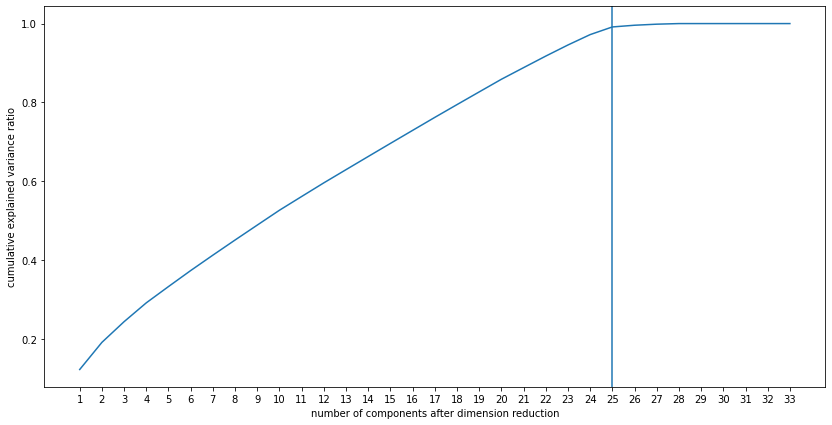

In [16]:
# 选择最好的n_components：累积可解释方差贡献率曲线
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 7))
plt.plot(range(1,34),np.cumsum(pca.explained_variance_ratio_))
plt.xticks(range(1,34)) #这是为了限制坐标轴显示为整数
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.axvline(25)
plt.show()

### 尝试选择前33个方差最大的变量

In [47]:
# 尝试选择所有变量
n_component = 33
pca = decomposition.PCA(n_components=n_component )
all_data_X_33 = pca.fit_transform(all_data_X) 
all_data_X_33 = pd.DataFrame(all_data_X_33)
all_data_X_33.index=all_data.index

In [48]:
# labeling the plot
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
labels

{'0': 'PC 1 (84.1%)',
 '1': 'PC 2 (14.1%)',
 '2': 'PC 3 (1.0%)',
 '3': 'PC 4 (0.6%)',
 '4': 'PC 5 (0.0%)',
 '5': 'PC 6 (0.0%)',
 '6': 'PC 7 (0.0%)',
 '7': 'PC 8 (0.0%)',
 '8': 'PC 9 (0.0%)',
 '9': 'PC 10 (0.0%)',
 '10': 'PC 11 (0.0%)',
 '11': 'PC 12 (0.0%)',
 '12': 'PC 13 (0.0%)',
 '13': 'PC 14 (0.0%)',
 '14': 'PC 15 (0.0%)',
 '15': 'PC 16 (0.0%)',
 '16': 'PC 17 (0.0%)',
 '17': 'PC 18 (0.0%)',
 '18': 'PC 19 (0.0%)',
 '19': 'PC 20 (0.0%)',
 '20': 'PC 21 (0.0%)',
 '21': 'PC 22 (0.0%)',
 '22': 'PC 23 (0.0%)',
 '23': 'PC 24 (0.0%)',
 '24': 'PC 25 (0.0%)',
 '25': 'PC 26 (0.0%)',
 '26': 'PC 27 (0.0%)',
 '27': 'PC 28 (0.0%)',
 '28': 'PC 29 (0.0%)',
 '29': 'PC 30 (0.0%)',
 '30': 'PC 31 (0.0%)',
 '31': 'PC 32 (0.0%)',
 '32': 'PC 33 (0.0%)'}

In [49]:
#divide all data into training set and test set
import copy
from datetime import date
train_data_task4_X=copy.deepcopy(pd.DataFrame(all_data_X_33))
test_data_task4_X=copy.deepcopy(pd.DataFrame(all_data_X_33))

train_data_task4_y=copy.deepcopy(all_data_y)
test_data_task4_y=copy.deepcopy(all_data_y)
for i in all_data.index:
   if date(all_data_y_1['year'][i],all_data_y_1['month'][i],all_data_y_1['day'][i]).weekday()==3:
      train_data_task4_X.drop(index=i,inplace=True)
      train_data_task4_y.drop(index=i,inplace=True)
   else:
      test_data_task4_X.drop(index=i,inplace=True)
      test_data_task4_y.drop(index=i,inplace=True)

In [50]:
#Do the OLS regression required in task 2
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(train_data_task4_X,train_data_task4_y['pm2.5'])
lm.score(train_data_task4_X,train_data_task4_y['pm2.5']),lm.score(test_data_task4_X,test_data_task4_y['pm2.5'])

(0.5860676715008221, 0.5613402613125829)

In [51]:
#Ridge regression
from sklearn.linear_model import Ridge
lr=Ridge()
lr.fit(train_data_task4_X,train_data_task4_y['pm2.5'])
lr.score(train_data_task4_X,train_data_task4_y['pm2.5']),lr.score(test_data_task4_X,test_data_task4_y['pm2.5'])

(0.5860603470939887, 0.561465610322686)

In [52]:
#LASSO regression
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(train_data_task4_X,train_data_task4_y['pm2.5'])
la.score(train_data_task4_X,train_data_task4_y['pm2.5']),la.score(test_data_task4_X,test_data_task4_y['pm2.5'])

(0.30690999930373475, 0.32366693174757133)

In [53]:
#catboost
from catboost import CatBoostRegressor
score_4=pd.DataFrame(columns=['learning_rate','score'])
for i in range(-10,11):
    # ctr=CatBoostRegressor(n_estimators=1500,max_depth=6,learning_rate=0.03982+i*0.0001/20)
    learning_rate = 0.045+0.0005*i
    ctr=CatBoostRegressor(n_estimators=1500,max_depth=6,learning_rate=learning_rate)
    ctr.fit(train_data_task4_X,train_data_task4_y['pm2.5'])
    new=pd.DataFrame({'learning_rate':learning_rate,'score':ctr.score(test_data_task4_X,test_data_task4_y['pm2.5'])},index=[1])
    score_4=score_4.append(new,ignore_index=True)

0:	learn: 0.9955823	total: 7.46ms	remaining: 11.2s
1:	learn: 0.9783853	total: 15ms	remaining: 11.2s
2:	learn: 0.9613470	total: 21.9ms	remaining: 10.9s
3:	learn: 0.9461397	total: 30.8ms	remaining: 11.5s
4:	learn: 0.9312969	total: 37.5ms	remaining: 11.2s
5:	learn: 0.9170992	total: 45.2ms	remaining: 11.3s
6:	learn: 0.9036083	total: 51.9ms	remaining: 11.1s
7:	learn: 0.8915884	total: 59.3ms	remaining: 11.1s
8:	learn: 0.8806294	total: 65.9ms	remaining: 10.9s
9:	learn: 0.8691603	total: 73.8ms	remaining: 11s
10:	learn: 0.8582835	total: 81.3ms	remaining: 11s
11:	learn: 0.8476537	total: 88.2ms	remaining: 10.9s
12:	learn: 0.8384362	total: 94.8ms	remaining: 10.8s
13:	learn: 0.8289700	total: 101ms	remaining: 10.7s
14:	learn: 0.8207460	total: 111ms	remaining: 11s
15:	learn: 0.8128538	total: 118ms	remaining: 10.9s
16:	learn: 0.8043298	total: 127ms	remaining: 11.1s
17:	learn: 0.7967668	total: 134ms	remaining: 11s
18:	learn: 0.7904736	total: 141ms	remaining: 11s
19:	learn: 0.7833362	total: 147ms	remain

In [54]:
score_4

learning_rate     score
0          0.0400  0.679595
1          0.0405  0.680335
2          0.0410  0.679628
3          0.0415  0.679676
4          0.0420  0.681108
5          0.0425  0.681042
6          0.0430  0.681111
7          0.0435  0.680281
8          0.0440  0.678904
9          0.0445  0.678954
10         0.0450  0.680066
11         0.0455  0.678633
12         0.0460  0.680153
13         0.0465  0.680473
14         0.0470  0.680587
15         0.0475  0.680126
16         0.0480  0.679570
17         0.0485  0.680305
18         0.0490  0.679418
19         0.0495  0.681125
20         0.0500  0.680549

In [55]:
ctr=CatBoostRegressor(n_estimators=1500,max_depth=6,learning_rate=0.0430)
ctr.fit(train_data_task4_X,train_data_task4_y['pm2.5'])
ctr.score(train_data_task4_X,train_data_task4_y['pm2.5']),ctr.score(test_data_task4_X,test_data_task4_y['pm2.5'])

0:	learn: 0.9942340	total: 8.88ms	remaining: 13.3s
1:	learn: 0.9758319	total: 16.2ms	remaining: 12.1s
2:	learn: 0.9576763	total: 23.9ms	remaining: 11.9s
3:	learn: 0.9415447	total: 30.4ms	remaining: 11.4s
4:	learn: 0.9258620	total: 37.6ms	remaining: 11.2s
5:	learn: 0.9109250	total: 44.9ms	remaining: 11.2s
6:	learn: 0.8967960	total: 53.2ms	remaining: 11.3s
7:	learn: 0.8842562	total: 59.6ms	remaining: 11.1s
8:	learn: 0.8724018	total: 66.7ms	remaining: 11.1s
9:	learn: 0.8606217	total: 73.9ms	remaining: 11s
10:	learn: 0.8494164	total: 81.4ms	remaining: 11s
11:	learn: 0.8397371	total: 87.8ms	remaining: 10.9s
12:	learn: 0.8296897	total: 94.4ms	remaining: 10.8s
13:	learn: 0.8199548	total: 102ms	remaining: 10.8s
14:	learn: 0.8116815	total: 108ms	remaining: 10.7s
15:	learn: 0.8032845	total: 116ms	remaining: 10.7s
16:	learn: 0.7947172	total: 123ms	remaining: 10.7s
17:	learn: 0.7871112	total: 129ms	remaining: 10.7s
18:	learn: 0.7801753	total: 136ms	remaining: 10.6s
19:	learn: 0.7728931	total: 143m

(0.8299640958183192, 0.6811108264752297)

### 尝试选择前28个方差最大的变量

In [21]:

# 尝试选择前28个方差最大的变量
n_component = 28
pca = decomposition.PCA(n_components=n_component )
all_data_X_28 = pca.fit_transform(all_data_X) 
all_data_X_28 = pd.DataFrame(all_data_X_28)
all_data_X_28.index=all_data.index


In [22]:
# labeling the plot
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
labels


{'0': 'PC 1 (84.1%)',
 '1': 'PC 2 (14.1%)',
 '2': 'PC 3 (1.0%)',
 '3': 'PC 4 (0.6%)',
 '4': 'PC 5 (0.0%)',
 '5': 'PC 6 (0.0%)',
 '6': 'PC 7 (0.0%)',
 '7': 'PC 8 (0.0%)',
 '8': 'PC 9 (0.0%)',
 '9': 'PC 10 (0.0%)',
 '10': 'PC 11 (0.0%)',
 '11': 'PC 12 (0.0%)',
 '12': 'PC 13 (0.0%)',
 '13': 'PC 14 (0.0%)',
 '14': 'PC 15 (0.0%)',
 '15': 'PC 16 (0.0%)',
 '16': 'PC 17 (0.0%)',
 '17': 'PC 18 (0.0%)',
 '18': 'PC 19 (0.0%)',
 '19': 'PC 20 (0.0%)',
 '20': 'PC 21 (0.0%)',
 '21': 'PC 22 (0.0%)',
 '22': 'PC 23 (0.0%)',
 '23': 'PC 24 (0.0%)',
 '24': 'PC 25 (0.0%)',
 '25': 'PC 26 (0.0%)',
 '26': 'PC 27 (0.0%)',
 '27': 'PC 28 (0.0%)'}

In [23]:
#divide all data into training set and test set
import copy
from datetime import date
train_data_task3_X=copy.deepcopy(pd.DataFrame(all_data_X_28))
test_data_task3_X=copy.deepcopy(pd.DataFrame(all_data_X_28))

train_data_task3_y=copy.deepcopy(all_data_y)
test_data_task3_y=copy.deepcopy(all_data_y)
for i in all_data.index:
   if date(all_data_y_1['year'][i],all_data_y_1['month'][i],all_data_y_1['day'][i]).weekday()==3:
      train_data_task3_X.drop(index=i,inplace=True)
      train_data_task3_y.drop(index=i,inplace=True)
   else:
      test_data_task3_X.drop(index=i,inplace=True)
      test_data_task3_y.drop(index=i,inplace=True)



In [24]:
#Do the OLS regression required in task 2
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(train_data_task3_X,train_data_task3_y['pm2.5'])
lm.score(train_data_task3_X,train_data_task3_y['pm2.5']),lm.score(test_data_task3_X,test_data_task3_y['pm2.5'])



(0.586062221405365, 0.5613400026572031)

In [25]:
#Ridge regression
from sklearn.linear_model import Ridge
lr=Ridge()
lr.fit(train_data_task3_X,train_data_task3_y['pm2.5'])
lr.score(train_data_task3_X,train_data_task3_y['pm2.5']),lr.score(test_data_task3_X,test_data_task3_y['pm2.5'])



(0.5860603470939887, 0.561465610322686)

In [26]:
#LASSO regression
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(train_data_task3_X,train_data_task3_y['pm2.5'])
la.score(train_data_task3_X,train_data_task3_y['pm2.5']),la.score(test_data_task3_X,test_data_task3_y['pm2.5'])



(0.30690999930373475, 0.32366693174757133)

In [27]:
#catboost
from catboost import CatBoostRegressor
score_3=pd.DataFrame(columns=['learning_rate','score'])
for i in range(-10,11):
    # ctr=CatBoostRegressor(n_estimators=1500,max_depth=6,learning_rate=0.03982+i*0.0001/20)
    learning_rate = 0.045+0.0005*i
    ctr=CatBoostRegressor(n_estimators=1500,max_depth=6,learning_rate=learning_rate)
    ctr.fit(train_data_task3_X,train_data_task3_y['pm2.5'])
    new=pd.DataFrame({'learning_rate':learning_rate,'score':ctr.score(test_data_task3_X,test_data_task3_y['pm2.5'])},index=[1])
    score_3=score_3.append(new,ignore_index=True)


0:	learn: 0.9952496	total: 7.8ms	remaining: 11.7s
1:	learn: 0.9778497	total: 14.1ms	remaining: 10.6s
2:	learn: 0.9609040	total: 20.2ms	remaining: 10.1s
3:	learn: 0.9457133	total: 25.9ms	remaining: 9.68s
4:	learn: 0.9309452	total: 31.6ms	remaining: 9.44s
5:	learn: 0.9163932	total: 38.2ms	remaining: 9.51s
6:	learn: 0.9027829	total: 44.2ms	remaining: 9.43s
7:	learn: 0.8910327	total: 50.1ms	remaining: 9.35s
8:	learn: 0.8789702	total: 57.1ms	remaining: 9.46s
9:	learn: 0.8674722	total: 63.2ms	remaining: 9.41s
10:	learn: 0.8569387	total: 70ms	remaining: 9.47s
11:	learn: 0.8465440	total: 77.2ms	remaining: 9.58s
12:	learn: 0.8373401	total: 84ms	remaining: 9.6s
13:	learn: 0.8284139	total: 90.7ms	remaining: 9.63s
14:	learn: 0.8200843	total: 96.8ms	remaining: 9.59s
15:	learn: 0.8113853	total: 104ms	remaining: 9.68s
16:	learn: 0.8035821	total: 110ms	remaining: 9.62s
17:	learn: 0.7964070	total: 117ms	remaining: 9.61s
18:	learn: 0.7892503	total: 123ms	remaining: 9.58s
19:	learn: 0.7824101	total: 128m

In [28]:
score_3

learning_rate     score
0          0.0400  0.680940
1          0.0405  0.681172
2          0.0410  0.681348
3          0.0415  0.679883
4          0.0420  0.680286
5          0.0425  0.680801
6          0.0430  0.682637
7          0.0435  0.682057
8          0.0440  0.681396
9          0.0445  0.679137
10         0.0450  0.682757
11         0.0455  0.678701
12         0.0460  0.681394
13         0.0465  0.679767
14         0.0470  0.682835
15         0.0475  0.679261
16         0.0480  0.680025
17         0.0485  0.680359
18         0.0490  0.679940
19         0.0495  0.679458
20         0.0500  0.682400

In [46]:
ctr=CatBoostRegressor(n_estimators=1500,max_depth=6,learning_rate=0.0430)
ctr.fit(train_data_task3_X,train_data_task3_y['pm2.5'])
ctr.score(train_data_task3_X,train_data_task3_y['pm2.5']),ctr.score(test_data_task3_X,test_data_task3_y['pm2.5'])

0:	learn: 0.9938763	total: 7.2ms	remaining: 10.8s
1:	learn: 0.9752685	total: 14.9ms	remaining: 11.2s
2:	learn: 0.9572135	total: 22.1ms	remaining: 11s
3:	learn: 0.9410955	total: 49.6ms	remaining: 18.5s
4:	learn: 0.9254949	total: 80.8ms	remaining: 24.2s
5:	learn: 0.9101974	total: 91.9ms	remaining: 22.9s
6:	learn: 0.8960321	total: 103ms	remaining: 21.9s
7:	learn: 0.8837738	total: 112ms	remaining: 20.8s
8:	learn: 0.8712400	total: 124ms	remaining: 20.5s
9:	learn: 0.8606112	total: 131ms	remaining: 19.5s
10:	learn: 0.8496522	total: 146ms	remaining: 19.7s
11:	learn: 0.8397676	total: 156ms	remaining: 19.3s
12:	learn: 0.8300814	total: 166ms	remaining: 19s
13:	learn: 0.8204971	total: 175ms	remaining: 18.6s
14:	learn: 0.8117974	total: 185ms	remaining: 18.3s
15:	learn: 0.8037212	total: 192ms	remaining: 17.8s
16:	learn: 0.7957144	total: 199ms	remaining: 17.3s
17:	learn: 0.7885656	total: 206ms	remaining: 16.9s
18:	learn: 0.7813495	total: 215ms	remaining: 16.7s
19:	learn: 0.7745376	total: 274ms	remain

(0.8300868067597248, 0.6826371565663263)

### 尝试选择前25个方差最大的变量

In [17]:
# 尝试选择前25个方差最大的变量
n_component = 25
pca = decomposition.PCA(n_components=n_component )
all_data_X_16 = pca.fit_transform(all_data_X) 
all_data_X_16 = pd.DataFrame(all_data_X_16)
all_data_X_16.index=all_data.index


In [18]:
# labeling the plot
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
labels


{'0': 'PC 1 (12.3%)',
 '1': 'PC 2 (6.9%)',
 '2': 'PC 3 (5.2%)',
 '3': 'PC 4 (4.8%)',
 '4': 'PC 5 (4.1%)',
 '5': 'PC 6 (4.1%)',
 '6': 'PC 7 (3.9%)',
 '7': 'PC 8 (3.8%)',
 '8': 'PC 9 (3.8%)',
 '9': 'PC 10 (3.8%)',
 '10': 'PC 11 (3.5%)',
 '11': 'PC 12 (3.5%)',
 '12': 'PC 13 (3.3%)',
 '13': 'PC 14 (3.3%)',
 '14': 'PC 15 (3.3%)',
 '15': 'PC 16 (3.3%)',
 '16': 'PC 17 (3.3%)',
 '17': 'PC 18 (3.2%)',
 '18': 'PC 19 (3.2%)',
 '19': 'PC 20 (3.2%)',
 '20': 'PC 21 (2.9%)',
 '21': 'PC 22 (2.9%)',
 '22': 'PC 23 (2.8%)',
 '23': 'PC 24 (2.6%)',
 '24': 'PC 25 (1.9%)'}

In [19]:
#divide all data into training set and test set
import copy
from datetime import date
train_data_task2_X=copy.deepcopy(pd.DataFrame(all_data_X_16))
test_data_task2_X=copy.deepcopy(pd.DataFrame(all_data_X_16))

train_data_task2_y=copy.deepcopy(all_data_y)
test_data_task2_y=copy.deepcopy(all_data_y)
for i in all_data.index:
   if date(all_data_y_1['year'][i],all_data_y_1['month'][i],all_data_y_1['day'][i]).weekday()==3:
      train_data_task2_X.drop(index=i,inplace=True)
      train_data_task2_y.drop(index=i,inplace=True)
   else:
      test_data_task2_X.drop(index=i,inplace=True)
      test_data_task2_y.drop(index=i,inplace=True)


In [20]:
#Do the OLS regression required in task 2
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(train_data_task2_X,train_data_task2_y['pm2.5'])
lm.score(train_data_task2_X,train_data_task2_y['pm2.5']),lm.score(test_data_task2_X,test_data_task2_y['pm2.5'])


(0.2975738349898921, 0.3036413015605063)

In [21]:
#Ridge regression
from sklearn.linear_model import Ridge
lr=Ridge()
lr.fit(train_data_task2_X,train_data_task2_y['pm2.5'])
lr.score(train_data_task2_X,train_data_task2_y['pm2.5']),lr.score(test_data_task2_X,test_data_task2_y['pm2.5'])


(0.2975738347725516, 0.3036423917133293)

In [22]:
#LASSO regression
from sklearn.linear_model import Lasso
la=Lasso()
la.fit(train_data_task2_X,train_data_task2_y['pm2.5'])
la.score(train_data_task2_X,train_data_task2_y['pm2.5']),la.score(test_data_task2_X,test_data_task2_y['pm2.5'])


(0.0, -0.0006271980869774207)

In [23]:
#catboost
from catboost import CatBoostRegressor
score_2=pd.DataFrame(columns=['learning_rate','score'])
for i in range(-10,11):
    # ctr=CatBoostRegressor(n_estimators=1500,max_depth=6,learning_rate=0.03982+i*0.0001/20)
    learning_rate = 0.035+0.0005*i
    ctr=CatBoostRegressor(n_estimators=1500,max_depth=6,learning_rate=learning_rate)
    ctr.fit(train_data_task2_X,train_data_task2_y['pm2.5'])
    new=pd.DataFrame({'learning_rate':learning_rate,'score':ctr.score(test_data_task2_X,test_data_task2_y['pm2.5'])},index=[1])
    score_2=score_2.append(new,ignore_index=True)


0:	learn: 1.0053466	total: 164ms	remaining: 4m 6s
1:	learn: 0.9973423	total: 171ms	remaining: 2m 7s
2:	learn: 0.9902055	total: 177ms	remaining: 1m 28s
3:	learn: 0.9830541	total: 184ms	remaining: 1m 8s
4:	learn: 0.9761035	total: 190ms	remaining: 56.8s
5:	learn: 0.9693681	total: 197ms	remaining: 49s
6:	learn: 0.9627321	total: 203ms	remaining: 43.4s
7:	learn: 0.9569317	total: 210ms	remaining: 39.1s
8:	learn: 0.9511043	total: 216ms	remaining: 35.8s
9:	learn: 0.9454618	total: 222ms	remaining: 33.1s
10:	learn: 0.9403556	total: 228ms	remaining: 30.9s
11:	learn: 0.9355373	total: 234ms	remaining: 29s
12:	learn: 0.9305801	total: 240ms	remaining: 27.5s
13:	learn: 0.9261462	total: 310ms	remaining: 32.9s
14:	learn: 0.9216100	total: 317ms	remaining: 31.3s
15:	learn: 0.9171795	total: 322ms	remaining: 29.9s
16:	learn: 0.9129638	total: 329ms	remaining: 28.7s
17:	learn: 0.9090456	total: 337ms	remaining: 27.7s
18:	learn: 0.9054056	total: 349ms	remaining: 27.2s
19:	learn: 0.9017252	total: 360ms	remaining:

In [24]:
score_2

learning_rate     score
0          0.0300  0.484245
1          0.0305  0.485923
2          0.0310  0.486426
3          0.0315  0.485834
4          0.0320  0.486711
5          0.0325  0.488963
6          0.0330  0.487790
7          0.0335  0.488745
8          0.0340  0.487901
9          0.0345  0.489719
10         0.0350  0.487935
11         0.0355  0.490626
12         0.0360  0.487748
13         0.0365  0.491485
14         0.0370  0.490757
15         0.0375  0.490436
16         0.0380  0.490288
17         0.0385  0.491749
18         0.0390  0.494058
19         0.0395  0.492207
20         0.0400  0.490979

In [25]:
ctr=CatBoostRegressor(n_estimators=1500,max_depth=6,learning_rate=0.039770)
ctr.fit(train_data_task2_X,train_data_task2_y['pm2.5'])
ctr.score(train_data_task2_X,train_data_task2_y['pm2.5']),ctr.score(test_data_task2_X,test_data_task2_y['pm2.5'])

0:	learn: 1.0026392	total: 6.55ms	remaining: 9.82s
1:	learn: 0.9926639	total: 12.8ms	remaining: 9.56s
2:	learn: 0.9829716	total: 18.9ms	remaining: 9.42s
3:	learn: 0.9737878	total: 24.6ms	remaining: 9.21s
4:	learn: 0.9651123	total: 30.4ms	remaining: 9.09s
5:	learn: 0.9568438	total: 36.1ms	remaining: 8.99s
6:	learn: 0.9488343	total: 41.8ms	remaining: 8.92s
7:	learn: 0.9419030	total: 47.4ms	remaining: 8.84s
8:	learn: 0.9350746	total: 52.9ms	remaining: 8.76s
9:	learn: 0.9288169	total: 58.4ms	remaining: 8.7s
10:	learn: 0.9229647	total: 63.8ms	remaining: 8.64s
11:	learn: 0.9171309	total: 69.1ms	remaining: 8.57s
12:	learn: 0.9114550	total: 74.4ms	remaining: 8.51s
13:	learn: 0.9066228	total: 79.8ms	remaining: 8.47s
14:	learn: 0.9015668	total: 85.2ms	remaining: 8.44s
15:	learn: 0.8967810	total: 90.6ms	remaining: 8.4s
16:	learn: 0.8924262	total: 96.1ms	remaining: 8.38s
17:	learn: 0.8882524	total: 101ms	remaining: 8.35s
18:	learn: 0.8844037	total: 107ms	remaining: 8.32s
19:	learn: 0.8806259	total

(0.7113137210308682, 0.49259482622968753)